Allison Aprile

CPE645 Final Project

Dog Camera - Method Exploration

# Thresholding
* Simplest of segmentation methods
* Applied on grayscale image
* Divide image pixels based on intensity
* Can be manual or automatic
* Generally three types:
  - **Global:** one value of T constant for image; maps to 1 if p(x,y) > T and 0 otherwise
  - **Variable:** T varies over the image; also called _adaptive_ thresholding when T is a function of x and y
  -**Multiple Thresholding:** similar to global thresholding, except there are more than two values of T
* For color images, can do _multiband_ thresholding, where a separate threshold is applied to each of the BGR components and combined with an AND operation
* Threshold T typically determined by evaluating histogram of (grayscale) pixel values

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount drive for testing images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load testing files in grayscale
test1 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test1.jpg', 0)
test2 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test2.jpg', 0)
test3 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test3.jpg', 0)
test4 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test4.jpg', 0)
test5 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test5.jpg', 0)
test6 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test6.jpg', 0)
test7 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test7.jpg', 0)

test_imgs = [test1, test2, test3, test4, test5, test6, test7]

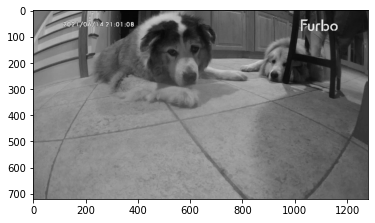

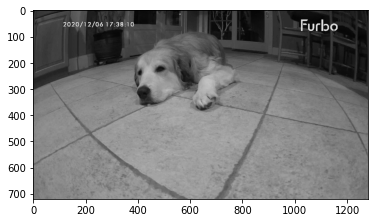

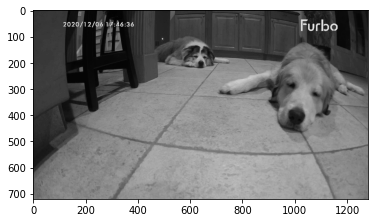

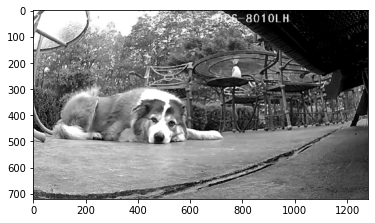

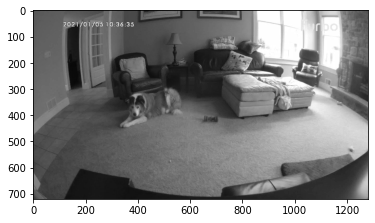

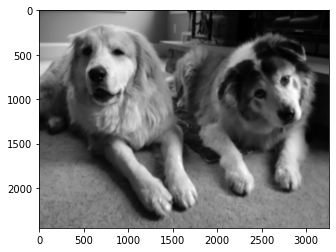

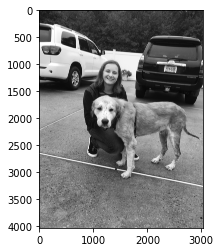

In [ ]:
# Plot images
for t in test_imgs:
  plt.imshow(t, cmap='gray')
  plt.show()

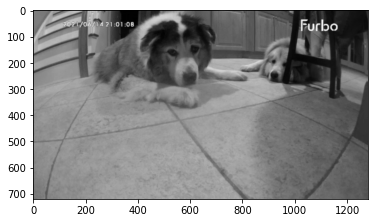

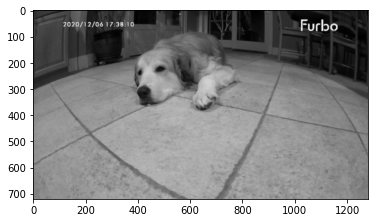

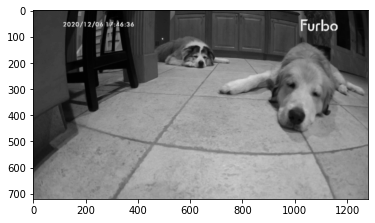

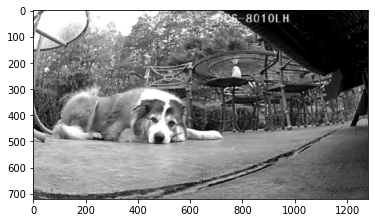

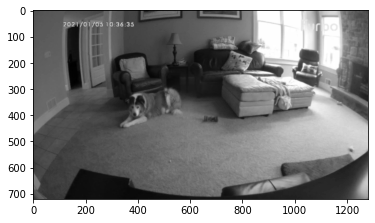

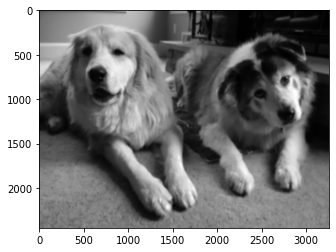

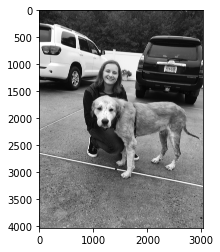

In [ ]:
# Apply Gaussian smoothing on images with 5x5 filter
for i in range(len(test_imgs)):
  t = cv2.GaussianBlur(test_imgs[i], (5, 5), 0)
  test_imgs[i] = t

  # Plot
  plt.imshow(t, cmap='gray')
  plt.show()

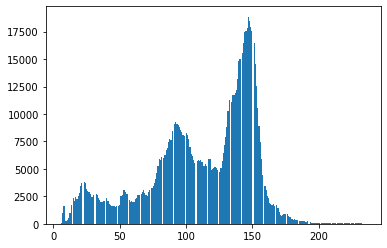

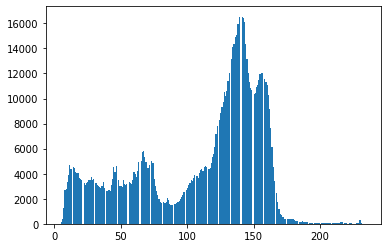

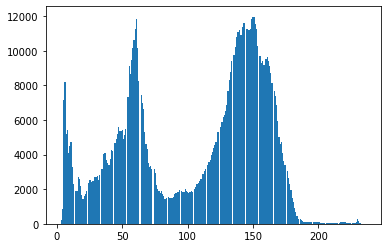

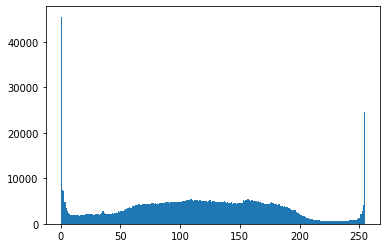

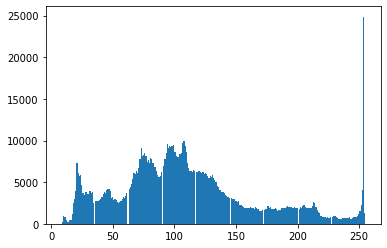

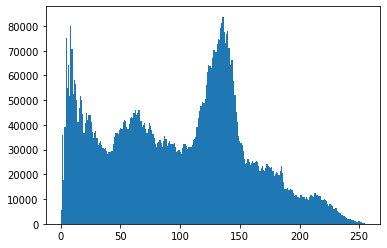

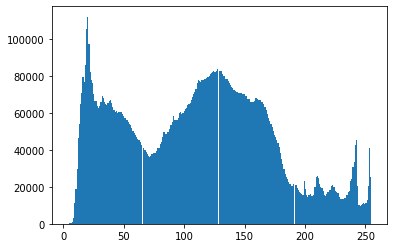

In [ ]:
# Plot histograms of pixel values
for t in test_imgs:
  plt.hist(t.ravel(), 256)
  plt.show()

### 1. Basic Global Thresholding
(https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html)

In [ ]:
# Define thresholding functions
methods = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO,
          cv2.THRESH_TOZERO_INV]

names = ['Binary', 'Binary Inverse', 'Truncated', 'To-Zero', 'To-Zero Inverse']

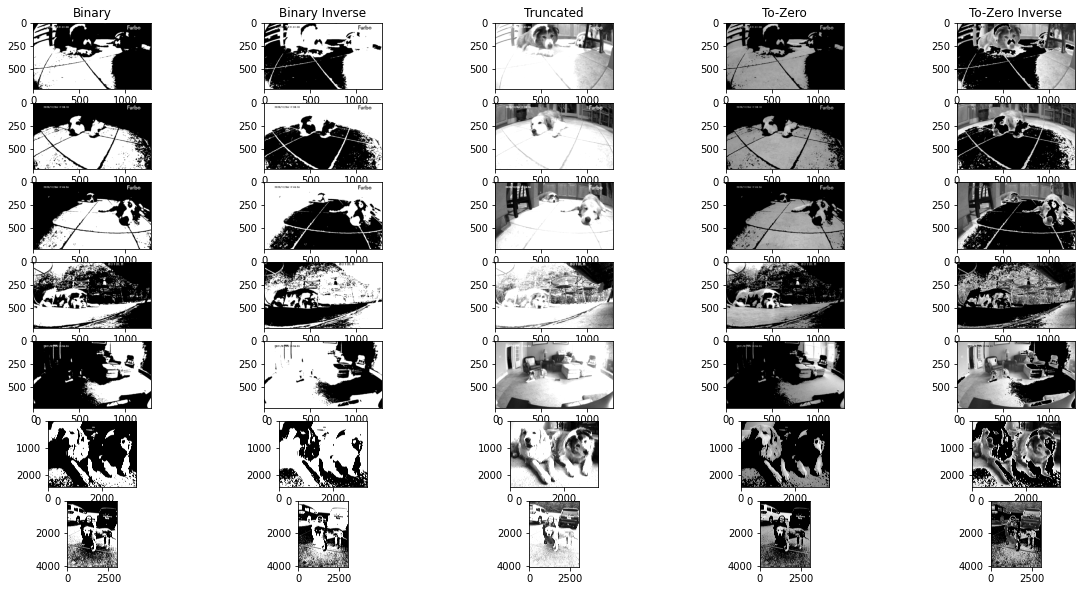

In [ ]:
# Show each image with the applied threshold
fig, axs = plt.subplots(len(test_imgs), len(methods))
fig.set_size_inches(20, 10)
for i in range(len(test_imgs)):
  for j in range(len(methods)):
    _, thresh = cv2.threshold(test_imgs[i], 127, 255, methods[j])
    axs[i, j].imshow(thresh, cmap='gray')
    if i == 0:
      axs[i, j].set_title(names[j])
plt.show()

### 2. Otsu Global Thresholding (Otsu Binarization)
(https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html)
(https://learnopencv.com/otsu-thresholding-with-opencv/)

* Automatically calcuates threshold value from image histogram
* Works best for _bimodal_ images

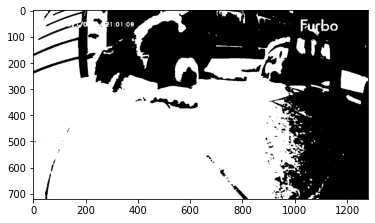

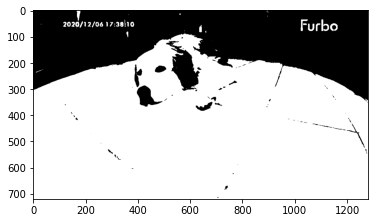

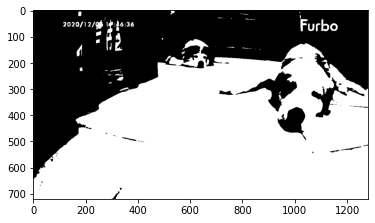

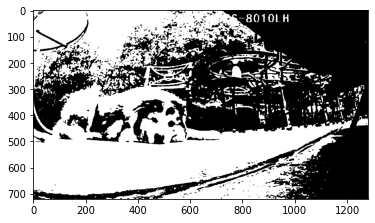

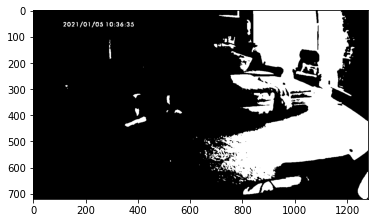

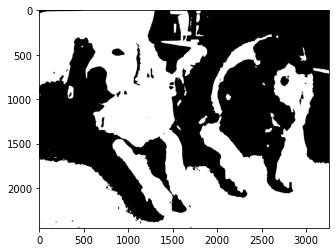

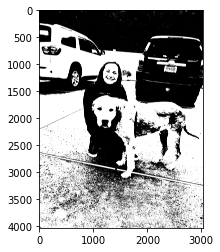

In [ ]:
# Show each image with the applied threshold
for t in test_imgs:
  _, thresh = cv2.threshold(t, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.imshow(thresh, cmap='gray')
  plt.show()

### 3. Variable (Adaptive) Thresholding
(https://www.pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/)

* Can compute using Arithmetic or Gaussian mean

In [ ]:
# Define thresholding functions
methods = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]

names = ['Arithmetic Mean', 'Gaussian Mean']

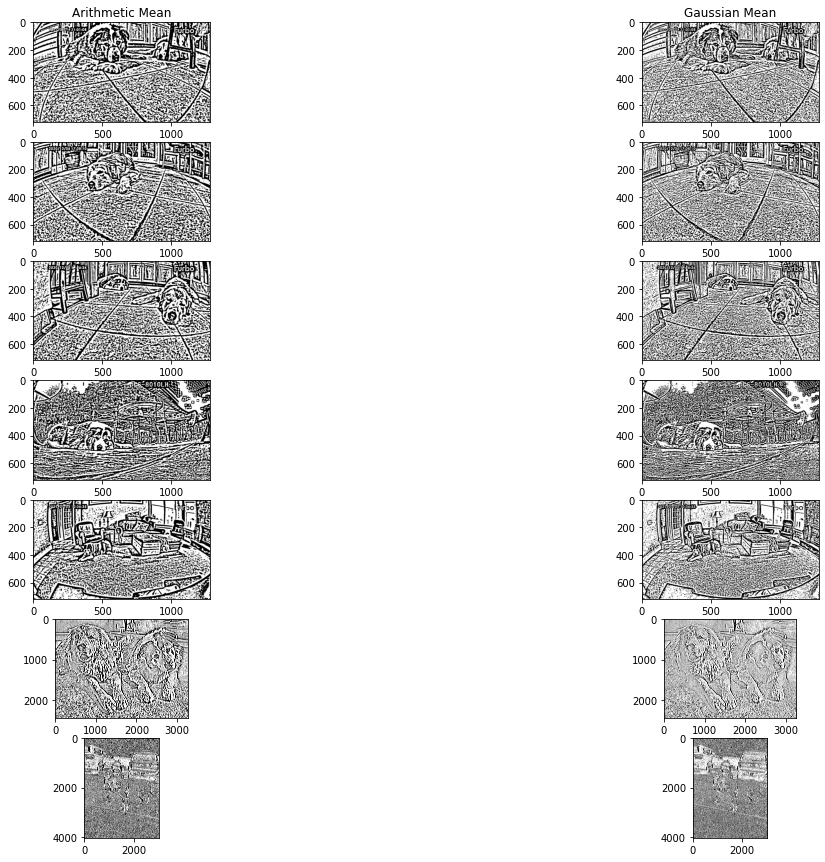

In [ ]:
# Show each image with the applied threshold
fig, axs = plt.subplots(len(test_imgs), len(methods))
fig.set_size_inches(20, 15)
for i in range(len(test_imgs)):
  for j in range(len(methods)):
    thresh = cv2.adaptiveThreshold(test_imgs[i], 255, methods[j], cv2.THRESH_BINARY, 21, 1)
    axs[i, j].imshow(thresh, cmap='gray')
    if i == 0:
      axs[i, j].set_title(names[j])
plt.show()